<a href="https://colab.research.google.com/github/sardarmoneeb/Machine-Learning/blob/main/Flicker_logos_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# {"username":"moneebkhan","key":"d2aa33b1df78e7cf6a74321bfd7d9248"}

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [1]:
!pip install opendatasets

In [3]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/samikshakolhe/flicker-47-logo-images-dataset'
target_path = '/content/drive/MyDrive/flicker_dataset'  # change if chaho

od.download(dataset_url, data_dir=target_path)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: moneebkhan
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/samikshakolhe/flicker-47-logo-images-dataset


100%|██████████| 5.50G/5.50G [01:00<00:00, 98.4MB/s]


In [4]:
train_dir = '/content/drive/MyDrive/flicker_dataset/flicker-47-logo-images-dataset/FlickrLogos_47/train'
test_dir  = '/content/drive/MyDrive/flicker_dataset/flicker-47-logo-images-dataset/FlickrLogos_47/test'


In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

img_height, img_width = 224, 224
batch_size = 32


In [7]:
import os

train_dir = '/content/drive/MyDrive/flicker_dataset/flicker-47-logo-images-dataset/FlickrLogos_47/train'
test_dir  = '/content/drive/MyDrive/flicker_dataset/flicker-47-logo-images-dataset/FlickrLogos_47/test'

print("Train folders:", os.listdir(train_dir))
print("Test folders:", os.listdir(test_dir))


Train folders: ['000000', '000001', '000002', 'filelist-logosonly.txt', 'filelist.txt', 'no-logo']
Test folders: ['000000', '000001', '000002', 'filelist.txt']


In [8]:
import os

train_dir = '/content/drive/MyDrive/flicker_dataset/flicker-47-logo-images-dataset/FlickrLogos_47/train'
test_dir  = '/content/drive/MyDrive/flicker_dataset/flicker-47-logo-images-dataset/FlickrLogos_47/test'

# remove txt files accidentally detected as folders
for path in [train_dir, test_dir]:
    for item in os.listdir(path):
        if item.endswith('.txt'):
            file_path = os.path.join(path, item)
            os.remove(file_path)
            print(f"Removed: {file_path}")


Removed: /content/drive/MyDrive/flicker_dataset/flicker-47-logo-images-dataset/FlickrLogos_47/train/filelist-logosonly.txt
Removed: /content/drive/MyDrive/flicker_dataset/flicker-47-logo-images-dataset/FlickrLogos_47/train/filelist.txt
Removed: /content/drive/MyDrive/flicker_dataset/flicker-47-logo-images-dataset/FlickrLogos_47/test/filelist.txt


In [9]:
import shutil, random

src = os.path.join(train_dir, 'no-logo')
dst = os.path.join(test_dir, 'no-logo')
os.makedirs(dst, exist_ok=True)

# Copy 20 random images
images = [img for img in os.listdir(src) if img.lower().endswith(('.jpg', '.png', '.jpeg'))]
for img in random.sample(images, 20):
    shutil.copy(os.path.join(src, img), os.path.join(dst, img))

print("✅ Copied 20 random 'no-logo' images to test folder.")


✅ Copied 20 random 'no-logo' images to test folder.


In [10]:
print("Train folders:", os.listdir(train_dir))
print("Test folders:", os.listdir(test_dir))


Train folders: ['000000', '000001', '000002', 'no-logo']
Test folders: ['000000', '000001', '000002', 'no-logo']


In [11]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, image_size=(224, 224), batch_size=32
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir, image_size=(224, 224), batch_size=32
)
print("✅ Classes found:", train_ds.class_names)


Found 5769 files belonging to 4 classes.
Found 5473 files belonging to 4 classes.
✅ Classes found: ['000000', '000001', '000002', 'no-logo']


In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds  = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),

    # 🔹 Dropout layer added to prevent overfitting
    tf.keras.layers.Dropout(0.5),

    # Output layer for 4 classes
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Summary to verify structure
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
epochs = 10  # you can increase to 20–25 later for better accuracy

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=epochs
)


Epoch 1/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 839s 5s/step - accuracy: 0.6271 - loss: 1.0580 - val_accuracy: 0.3378 - val_loss: 1.2359
Epoch 2/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 725s 4s/step - accuracy: 0.6931 - loss: 0.8078 - val_accuracy: 0.3669 - val_loss: 1.3894
Epoch 3/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 741s 4s/step - accuracy: 0.6999 - loss: 0.7377 - val_accuracy: 0.3705 - val_loss: 1.4374
Epoch 4/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 720s 4s/step - accuracy: 0.7496 - loss: 0.6281 - val_accuracy: 0.3842 - val_loss: 1.2218
Epoch 5/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 721s 4s/step - accuracy: 0.7895 - loss: 0.5257 - val_accuracy: 0.3638 - val_loss: 1.6434
Epoch 6/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 718s 4s/step - accuracy: 0.8513 - loss: 0.3964 - val_accuracy: 0.3842 - val_loss: 1.6892
Epoch 7/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 718s 4s/step - accuracy: 0.8963 - loss: 0.2866 - val_accuracy: 0.3848 - val_loss: 2.0707
Epoch 8/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 744s 4s/step - accuracy: 0.9260 - loss: 0.2111 - val_accu

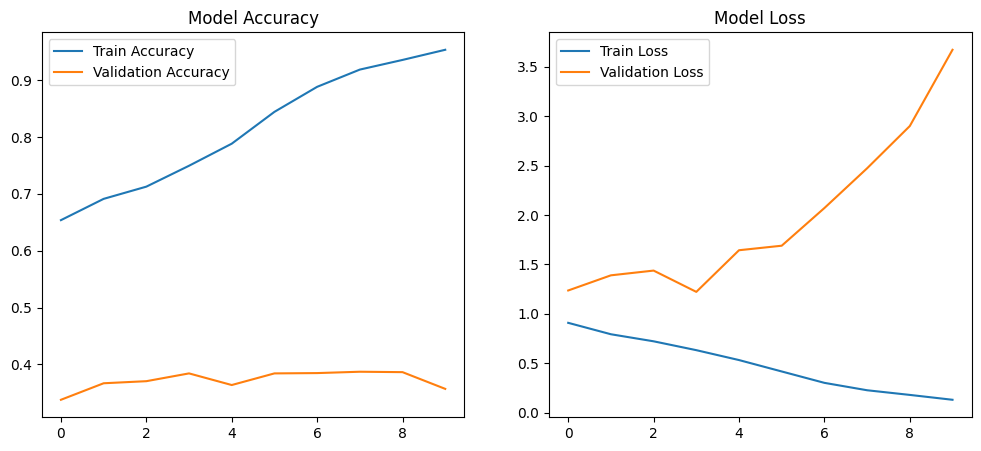

In [17]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


In [21]:
import os

path = '/content/drive/MyDrive/flicker_dataset/flicker-47-logo-images-dataset/FlickrLogos_47/test'
for root, dirs, files in os.walk(path):
    print(root, files)
    break  # only show the first level


/content/drive/MyDrive/flicker_dataset/flicker-47-logo-images-dataset/FlickrLogos_47/test []


In [22]:
import os

base = '/content/drive/MyDrive/flicker_dataset/flicker-47-logo-images-dataset/FlickrLogos_47'
for root, dirs, files in os.walk(base):
    print(root, dirs, files)
    break  # top level only


/content/drive/MyDrive/flicker_dataset/flicker-47-logo-images-dataset/FlickrLogos_47 ['scripts', 'test', 'train'] ['README.txt', 'className2ClassID.txt']


In [23]:
import os

train_path = '/content/drive/MyDrive/flicker_dataset/flicker-47-logo-images-dataset/FlickrLogos_47/train'
test_path = '/content/drive/MyDrive/flicker_dataset/flicker-47-logo-images-dataset/FlickrLogos_47/test'

print("Train subfolders:", os.listdir(train_path))
print("Test subfolders:", os.listdir(test_path))


Train subfolders: ['000000', '000001', '000002', 'no-logo']
Test subfolders: ['000000', '000001', '000002', 'no-logo']


In [24]:
import os

sample_path = '/content/drive/MyDrive/flicker_dataset/flicker-47-logo-images-dataset/FlickrLogos_47/train/000000'
print("Files in 000000:", os.listdir(sample_path))


Files in 000000: ['000000007.gt_data.txt', '000000007.mask00.png', '000000007.mask01.png', '000000007.mask02.png', '000000007.png', '000000010.gt_data.txt', '000000010.mask00.png', '000000010.mask01.png', '000000010.png', '000000014.gt_data.txt', '000000014.mask00.png', '000000014.mask01.png', '000000014.png', '000000015.gt_data.txt', '000000015.mask00.png', '000000015.mask01.png', '000000015.png', '000000017.gt_data.txt', '000000017.mask00.png', '000000017.mask01.png', '000000017.mask02.png', '000000017.mask03.png', '000000017.png', '000000019.gt_data.txt', '000000019.mask00.png', '000000019.mask01.png', '000000019.mask02.png', '000000019.mask03.png', '000000019.png', '000000020.gt_data.txt', '000000020.mask00.png', '000000020.mask01.png', '000000020.mask02.png', '000000020.png', '000000022.gt_data.txt', '000000022.mask00.png', '000000022.mask01.png', '000000022.mask02.png', '000000022.png', '000000025.gt_data.txt', '000000025.mask00.png', '000000025.mask01.png', '000000025.png', '000

In [26]:
import os

base_path = '/content/drive/MyDrive/flicker_dataset/flicker-47-logo-images-dataset/FlickrLogos_47/test'

for root, dirs, files in os.walk(base_path):
    for f in files:
        if f.lower().endswith(('.jpg', '.jpeg', '.png')):
            print("✅ Found image:", os.path.join(root, f))
            raise SystemExit  # stop after first image is found
print("❌ No image found in the test folder.")


✅ Found image: /content/drive/MyDrive/flicker_dataset/flicker-47-logo-images-dataset/FlickrLogos_47/test/000000/000000000.mask00.png


SystemExit: 

/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [29]:
def predict_image(img_path):
    import numpy as np
    import tensorflow as tf

    # Load and preprocess
    img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    # Predict
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    # Display
    print(f"\n🖼️ Image: {img_path}")
    print(f"🎯 Predicted Class: {class_names[np.argmax(score)]}")
    print(f"📊 Confidence: {100 * np.max(score):.2f}%")

    # Show all probabilities
    print("\nAll Class Probabilities:")
    for name, prob in zip(class_names, score):
        print(f"{name}: {prob*100:.2f}%")


In [30]:
predict_image('/content/drive/MyDrive/flicker_dataset/flicker-47-logo-images-dataset/FlickrLogos_47/test/000001/000001002.mask00.png')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step

🖼️ Image: /content/drive/MyDrive/flicker_dataset/flicker-47-logo-images-dataset/FlickrLogos_47/test/000001/000001002.mask00.png
🎯 Predicted Class: 000000
📊 Confidence: 45.34%

All Class Probabilities:
000000: 45.34%
000001: 18.99%
000002: 17.84%
no-logo: 17.83%


In [31]:
model.save('/content/drive/MyDrive/flicker_dataset/logo_cnn_model.h5')
print("Model saved successfully ✅")


Model saved successfully ✅


In [ ]:
# # from google.colab import drive
# # drive.mount('/content/drive')
# # import tensorflow as tf
# import numpy as np

# model = tf.keras.models.load_model('/content/drive/MyDrive/flicker_dataset/logo_cnn_model.h5')

# train_ds = tf.keras.utils.image_dataset_from_directory(
#     '/content/drive/MyDrive/flicker_dataset/flicker-47-logo-images-dataset/FlickrLogos_47/train',
#     image_size=(224, 224),
#     batch_size=1,
#     shuffle=False
# )
# class_names = train_ds.class_names
# print("✅ Class names loaded:", class_names)

# def predict_image(img_path):
#     img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
#     img_array = tf.keras.utils.img_to_array(img)
#     img_array = tf.expand_dims(img_array, 0)
#     predictions = model.predict(img_array)
#     score = tf.nn.softmax(predictions[0])
#     print(f"\n🖼️ Image: {img_path}")
#     print(f"🎯 Predicted Class: {class_names[np.argmax(score)]}")
#     print(f"📊 Confidence: {100 * np.max(score):.2f}%")


In [32]:
import shutil

# Source folder (your dataset)
src_folder = '/content/drive/MyDrive/flicker_dataset/flicker-47-logo-images-dataset/FlickrLogos_47'

# Destination (zip file path)
zip_path = '/content/drive/MyDrive/flicker_dataset/FlickrLogos_47_backup.zip'

# Create ZIP file
shutil.make_archive(zip_path.replace('.zip', ''), 'zip', src_folder)

print("✅ Dataset successfully backed up as ZIP file:")
print(zip_path)


✅ Dataset successfully backed up as ZIP file:
/content/drive/MyDrive/flicker_dataset/FlickrLogos_47_backup.zip
